# Figure 12: Benchmarking cell ECM graphs against other methods 

In [1]:
import sys
import os
import matplotlib.pyplot as plt 

from collections import Counter

# Third-party library imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# Local module imports
os.chdir('C:/Users/Adminn/Documents/GitHub/CEG/src')
from Graph_builder import *  # Import graph-building utilities
from CellECMGraphs_multiple import *  # Import Cell-ECM graph utilities
from Helper_functions import *  # Import helper functions
from SimData_Generator import *

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)


import torch 
from tqdm import tqdm 

In [2]:
# Load cell-ECM graph with ground truth regions 
ceg_gt = load_ceg("C:/Users/Adminn/Desktop/PhD/cell_ECM_graphs/Benchmarking/benchmark_data/benchmark_dataset.dill").ceg_dict[0]
ceg_gt.single = True # Auto visualization 

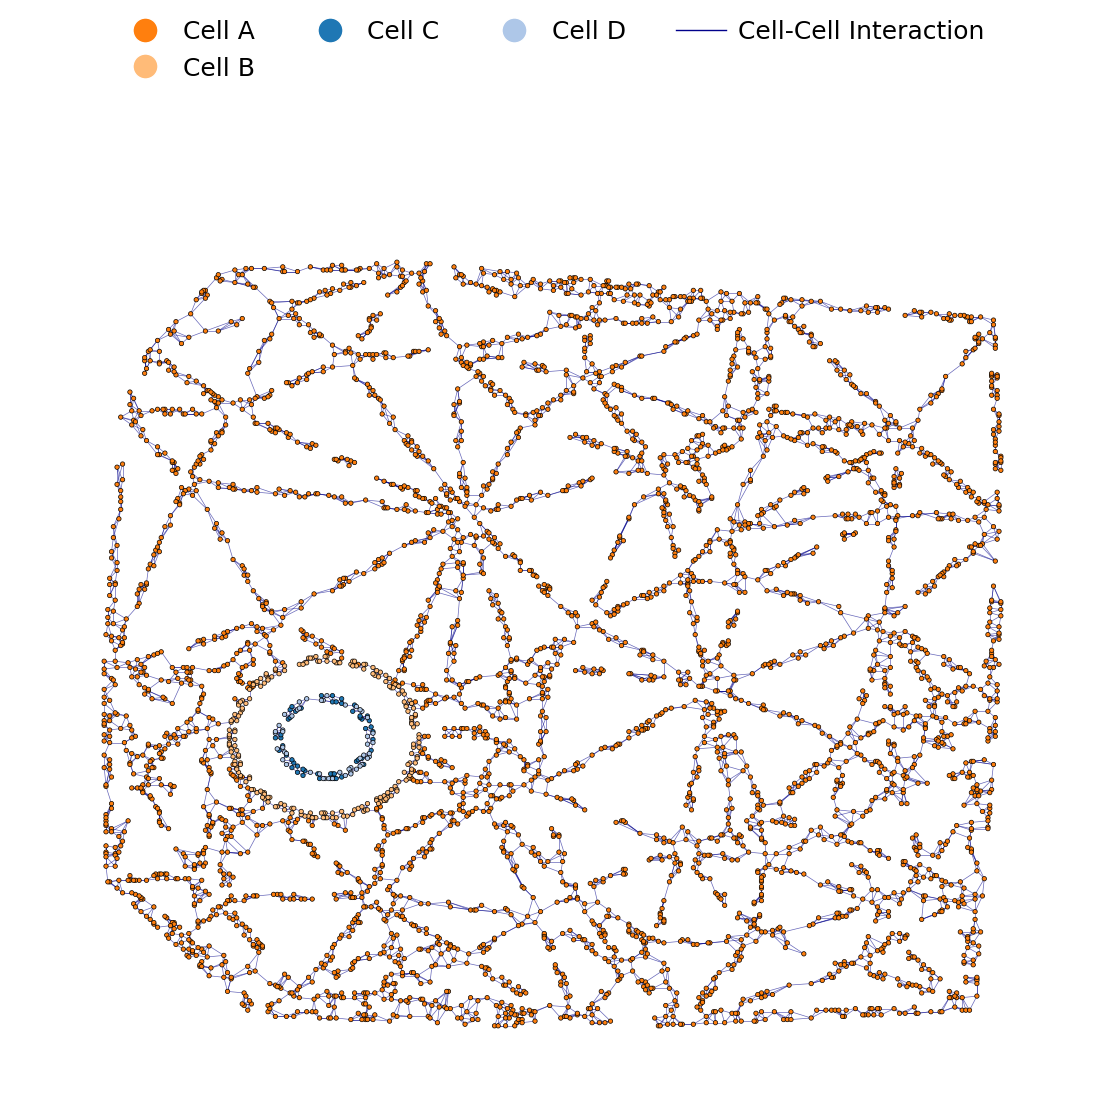

In [3]:
ceg_gt.visualize_cell_cell_interactions()

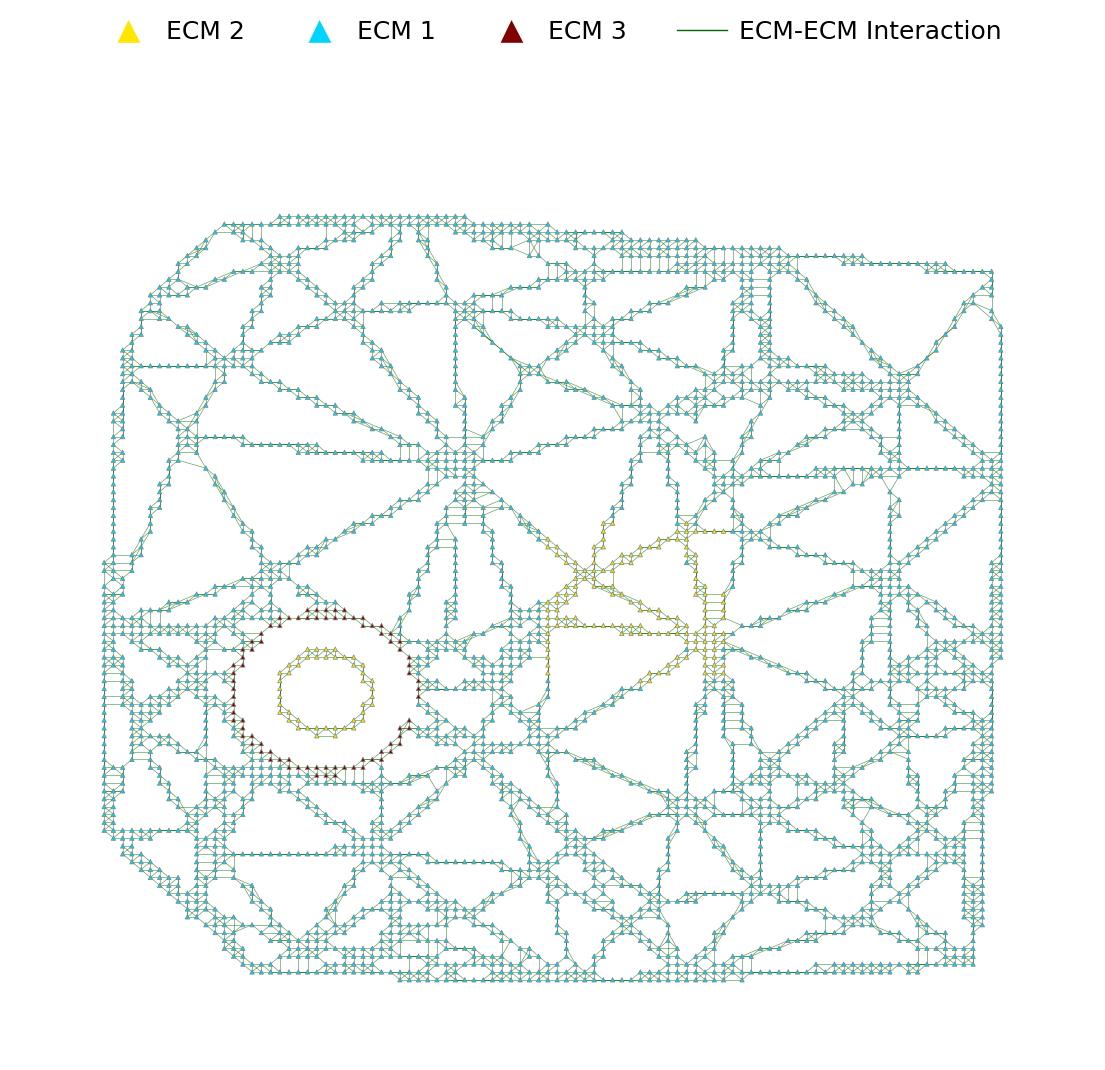

In [4]:
ceg_gt.visualize_ecm_ecm_interactions()

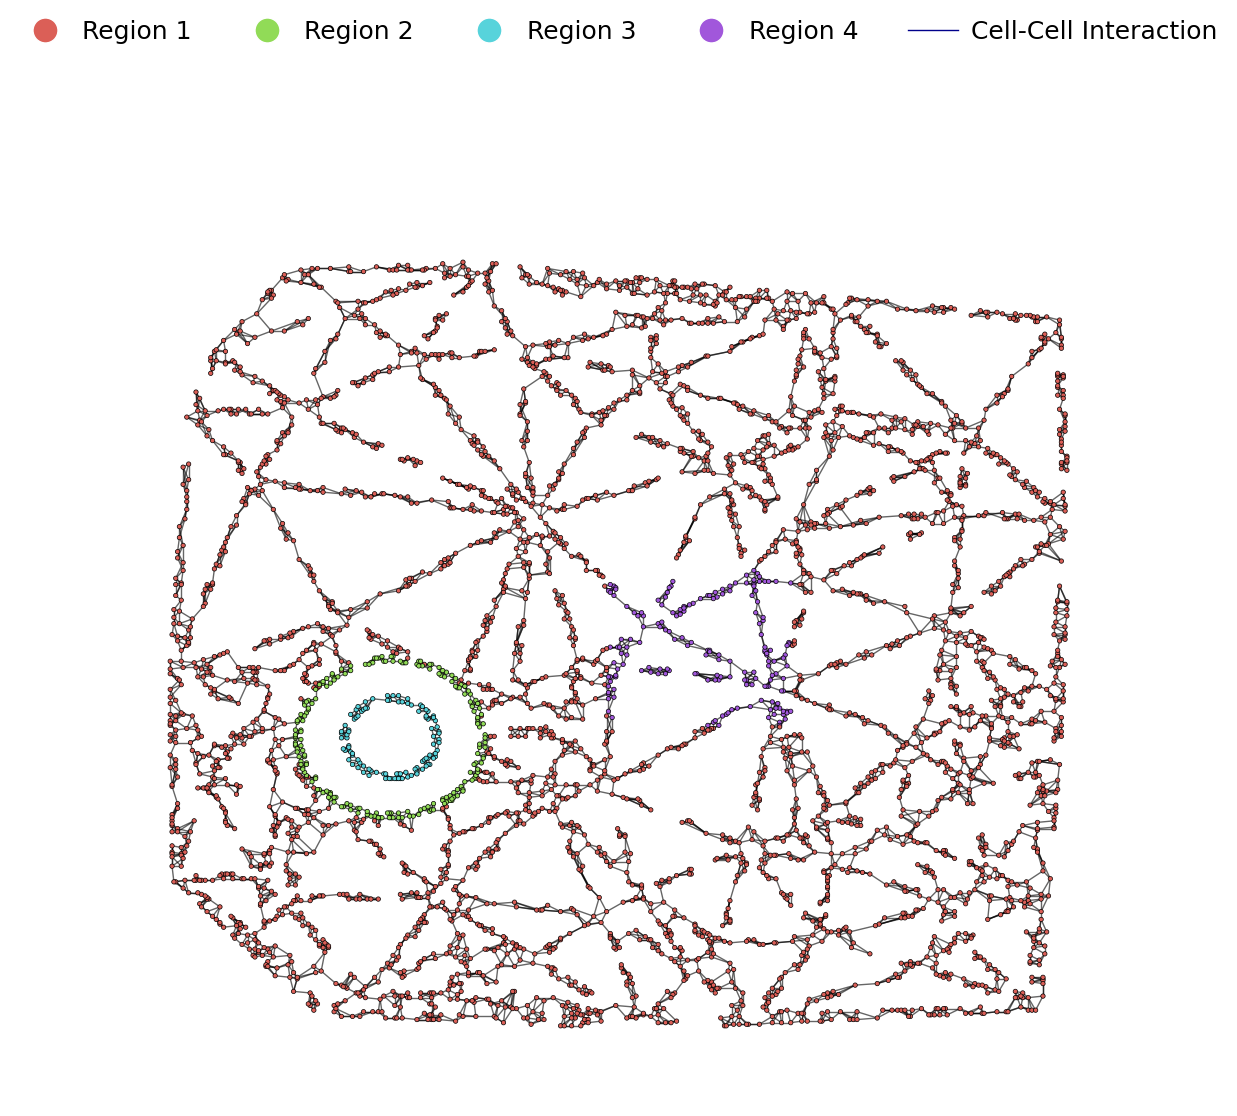

In [5]:
visualize_cell_labels(ceg_gt, 'ground_truth_label')

In [ ]:
# Get cellular and ECM neighbourhood 
x, y, cell_or_ecm = embeddings_neighbourhood_feature_vector_gt(ceg_g, g_type = 'cellgraph')

# Convert to % 
x_df = convert_to_percentage(pd.DataFrame(x))

# Balance dataset 
smote = SMOTE(random_state=42)
x_bal, y_bal = smote.fit_resample(x_df, y) 

# Apply K_means clustering 
## train on balanced dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_bal)
## Predict labels for the original datasetq
labels = kmeans.predict(x_df)

# Add labels to nodes as cell_neighbourhood
for i, n in enumerate(ceg_gt.G.nodes):
    ceg_gt.G.nodes[n]['cell_ecm_neighbourhood'] = labels[i]

TypeError: embeddings_neighbourhood_feature_vector_gt() missing 1 required positional argument: 'g_type'

In [ ]:
visualize_cell_labels(ceg_gt, 'cell_ecm_neighbourhood')

In [ ]:
# Get cellular and ECM neighbourhood 
x, y, cell_or_ecm = embeddings_neighbourhood_feature_vector_gt(ceg_gt)

# Convert to % 
x_df = convert_to_percentage(pd.DataFrame(x))

# Balance dataset 
smote = SMOTE(random_state=42)
x_bal, y_bal = smote.fit_resample(x_df, y) 

# Apply K_means clustering 
## train on balanced dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_bal)
## Predict labels for the original datasetq
labels = kmeans.predict(x_df)

# Add labels to nodes as cell_neighbourhood
for i, n in enumerate(ceg_gt.G.nodes):
    ceg_gt.G.nodes[n]['cell_ecm_neighbourhood'] = labels[i]